# Séries de Fourier - Introdução

In [26]:
import os
import sys

# Obtém o caminho do diretório atual do notebook
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Navega até o diretório raiz do projeto (subindo dois níveis)
# De 'pages/part02/chapter01' para 'seu_projeto/'
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..'))

# Adiciona o diretório raiz do projeto ao sys.path
sys.path.append(os.path.join(project_root))
sys.path.append(os.path.join(project_root, 'scripts'))

# Diretiva utilizada para executar o código em um ambiente Jupyter Notebook
%reload_ext autoreload
%autoreload 2

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils

from scipy.io import wavfile


Agora vamos entender a Série de Fourier e qual a sua utilidade.

Conforme {cite:ts}`gonzalesProcessamentoDigitalImagens2013`, "a função `f(t)` de uma variável contínua `t` periódica com o período, `T`, pode ser expressa como a soma dos senos e cossenos multiplicada por coeficientes apropriados. Essa soma, conhecida como série de Fourier", tem a forma:

$$
f(t)=\sum^{\infty}_{n=-\infty} c_{n}e^{j \frac{2 \pi n}{T} t}
$$ (serie_fourier)

Mas vamos devagar, discorrer isso intuitivamente.

Imagine que você tem um som "A" puro, como o de um diapasão. Esse som pode ser representado por uma onda senoidal, que sobe e desce suavemente. Você poderá ver o gráfico do sinal mais abaixo se quiser.

**Sinal de A**:

$$
y_A=\sin(2\pi t)
$$ (sinal_A)



Antes de nos aprofundarmos mais na Série de Fourier e no exemplo do Sinal A acima, precisamos entender o que é o **período** e a **frequência** de um sinal.

---

## Período

Através do gráfico do sinal abaixo, perceba que esta onda se repete a cada segundo. Este tempo de repetição chamamos de 
**período** $T_A=1$.

Aqui iremos plotar $y_A(t)$ de $t = 0$ a $t = 3$ segundos (para ver 3 ciclos completos):

Você verá uma onda senoidal perfeita, que se repete a cada segundo. Essa é a representação gráfica do sinal A.

**Criação do Sinal A**

- Em `time_vector` vamos criar um conjunto de pontos no tempo para representar a onda.
- `y_A` é a função seno, que representa o sinal A, conforme Equação [](#sinal_A).
- Começamos em 0, vamos até 3 segundos (para ver alguns ciclos), e usamos 1000 pontos para ter uma curva suave.

Assim:

In [28]:
time_vector = np.linspace(0, 3, 1000, endpoint=False)

y_A = np.sin(2 * np.pi * time_vector)

Esta é uma representação gráfica do sinal de A.

In [4]:
# Criando o gráfico

utils.plot_signal(
    time_vector,
    y_A,
    title="Sinal A",
    x_title="Tempo (s)",
    y_title="Amplitude",
)

**Características do Gráfico**

1. **Amplitude**: Varia entre $-1$ e $1$ (veja o eixo vertical).
2. **Período**:
	 - Primeiro pico positivo em $t = 0.25$ s ou $\frac{\pi}{2}$
	 - Primeiro pico negativo em $t = 0.75$ s ou $\frac{3\pi}{2}$
	 - Repete o ciclo a cada $1$ segundo ou $2\pi$ em um círculo com volta completa.
3. **Pontos de Cruzamento em Zero**:
	 - $t = 0$, $t = 0.5$, $t = 1$, etc.


Conseguiu enxergar o período da onda? O tempo que leva para a onda voltar ao mesmo ponto?

---

## Frequência

A frequência é o *inverso* do período.

::: {tip} Dica
Ela diz *quantas vezes a onda se repete* em um segundo.
:::

**Frequência de A**:

$$
\begin{align*}
F(f_A)&=\frac{1}{T_A} \implies \\
& = \frac{1}{1} \implies \\
& = 1 \text{ Hz}
\end{align*}
$$

Isso significa que a onda A completa um ciclo (sobe, desce e volta ao ponto inicial) uma vez por segundo.



::: {attention} Atenção
Assim, como vimos antes, uma volta completa se dá em 360º ou $2\pi$ radianos (já que $\pi$ radianos é metade de uma volta completa ou 180º, lembra?).
:::

Agora que entendemos o conceito de frequência, podemos relacioná-la com a frequência angular.

O conceito de frequência angular $\omega$ é relacionada ao período $T$ por:

$$
\omega = \frac{2\pi}{T} \quad \Rightarrow \quad \omega = 2\pi \, \text{rad/s}.
$$

Vimos que a frequência $f$ é o inverso do período $T$, ou seja, $f = \frac{1}{T}$.

A frequência angular $\omega$ é a taxa de variação da fase de uma onda senoidal em radianos por segundo.

A relação entre frequência e frequência angular é dada por:

$$
\omega = 2\pi f \quad \Rightarrow \quad \omega = 2\pi \cdot 1 \, \text{rad/s} = 2\pi \, \text{rad/s}.
$$

A frequência angular é útil para descrever a velocidade de rotação de um sinal senoidal.

::: {tip} Curiosidade
A frequência angular é frequentemente usada em aplicações de processamento de sinais, como em circuitos elétricos e sistemas de controle.
:::

---


### Representação gráfica da frequência

Para um sinal puro (uma única senoide), a representação gráfica da frequência é trivial:

- No **eixo x** teremos a frequência (em Hz)
- No **eixo y** teremos a amplitude (ou magnitude)

Se definirmos, hipoteticamente, uma frequência de 1 Hz e uma amplitude de 1, o gráfico seria um ponto em (1, 1), concorda?

In [5]:
frequencia_A = 1  # em Hz
amplitude_A = 1  # em unidades arbitrárias

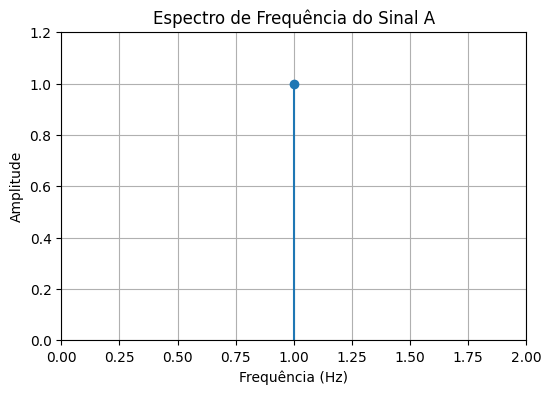

In [6]:
# Criando o gráfico
plt.figure(figsize=(6, 4))
plt.stem(
    [frequencia_A], [amplitude_A]
)  # Usamos 'stem' para um gráfico de linha vertical
plt.title("Espectro de Frequência do Sinal A")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 2)  # Definimos limites para o eixo x
plt.ylim(0, 1.2)  # Definimos limites para o eixo y
plt.grid(True)
plt.show()

Então, voltando para o sinal A definido na Equação [](#sinal_A), $y_A(t) = sin(2 \pi t)$, o gráfico acima representa um ponto em (1, 1), representando que a frequência é 1 Hz e a amplitude é 1 (assumindo que estamos plotando a amplitude da componente senoidal).

::: {note} Nota
O código apresentado antes do gráfico com uma única linha vertical em 1 Hz, representando a frequência do sinal A, contém a função `plt.stem` que é usada para criar esse tipo de gráfico discreto.
::: 

Vamos tentar escutar o som gerado por essa onda senoidal?

::: {danger} Impossível!
Ouvir este som a 1Hz é *inaudível* pelo ser humano!
:::

Já que não é possível, então vamos voltar ao exemplo do som criado em [](00-signals). Vamos analisar o som, só que agora através de um arquivo `.wav`.

## Análise de áudio em formato `.wav`

### Extração de metadados e sinal

Este arquivo contém uma onda senoidal pura, com frequência de 440 Hz (o famoso Lá4), que é a nota musical padrão para afinar instrumentos.

In [7]:
audio_name = "sinal_440Hz.wav"

In [8]:
# Abre o arquivo .wav
filename = os.path.join(project_root, "data", audio_name)

Vamos analisar algumas características do arquivo `.wav`:

::: {note} Informação
Os arquivos `.wav` são arquivos de áudio que armazenam dados de som digitalizados. Eles contêm informações sobre a amostragem, a taxa de bits e o número de canais, entre outros detalhes (na primeira parte) e os dados de áudio em si (na segunda parte).
:::

In [9]:
# Separar o 'sample_rate' e os dados 'brutos' do som
sample_rate, audio_data = wavfile.read(filename, "rb")

Ouvindo o som:

In [10]:
utils.play_sound(audio_data, sample_rate, autoplay=False)

### Análise de período por taxa de amostragem ou frequência

In [11]:
# Verifica os canais
if len(audio_data.shape) == 1:
    channels = 1  # Mono
else:
    channels = audio_data.shape[1]  # Estéreo ou mais

# Verifica a duração do áudio
duration = len(audio_data) / sample_rate

# Formato dos dados
data_format = audio_data.dtype

# Verifica o número de amostras
num_samples = audio_data.shape[0]

# Período de amostragem em segundos
sampling_period = (1 / sample_rate) * 100

# Período de amostragem em pi radianos
sampling_period_pi = (2 * np.pi / sample_rate) * 100

In [12]:
print(f"Duração: {duration:.2f} segundos")
print(f"Formato dos dados: {data_format}")
print(f"Taxa de amostragem ou frequência: {sample_rate} Hz")
print(f"Número de amostras: {num_samples} amostras")
print(f"Número de canais: {channels}")
print("Período de amostragem:")
print(f"- {sampling_period:.6f} segundos")
print(f"- {sampling_period_pi:.6f} radianos")

Duração: 5.00 segundos
Formato dos dados: int16
Taxa de amostragem ou frequência: 44100 Hz
Número de amostras: 220500 amostras
Número de canais: 1
Período de amostragem:
- 0.002268 segundos
- 0.014248 radianos


In [13]:
try:
    # Verifica se o arquivo é estéreo ou mono
    if len(audio_data.shape) == 2:
        print("O arquivo é estéreo.")
        audio_data = audio_data[:, 0]  # pega apenas um canal
    else:
        print("O arquivo é mono.")
except ValueError:
    print(
        "Erro ao ler o arquivo de áudio. Verifique se o arquivo existe e está no formato correto."
    )
    exit(1)

O arquivo é mono.


E como seriam os dados brutos do som? Vimos que ele possui uma quantidade considerável de amostras.

Eles iriam aparecer desta forma:

In [14]:
# Exibindo os dados brutos da nota la gerado através de um array numpy com os 100 primeiros valores,
# bem como a quantidade de amostras geradas.

audio_cut = audio_data[:100]

print("Dados brutos do áudiocom os 100 primeiros valores:\n")
np.set_printoptions(precision=4, suppress=True, linewidth=80)
print(audio_cut)

print(
    f"\nQuantidade de amostras geradas: {num_samples} amostras em {duration} segundos, perfazendo {sample_rate} amostras por segundo (Hz)."
)

Dados brutos do áudiocom os 100 primeiros valores:

[     0   2052   4097   6126   8130  10103  12036  13921  15752  17521  19222
  20846  22389  23844  25205  26467  27625  28675  29612  30433  31134  31713
  32167  32494  32695  32766  32709  32524  32210  31770  31206  30518  29711
  28787  27750  26604  25354  24004  22559  21026  19410  17718  15957  14132
  12253  10325   8356   6355   4329   2285    233  -1819  -3865  -5896  -7904
  -9881 -11818 -13710 -15547 -17324 -19032 -20666 -22218 -23683 -25055 -26329
 -27499 -28561 -29511 -30345 -31060 -31653 -32121 -32464 -32678 -32765 -32722
 -32551 -32252 -31827 -31276 -30603 -29809 -28898 -27874 -26740 -25501 -24162
 -22728 -21204 -19598 -17914 -16160 -14343 -12469 -10546  -8582  -6584  -4560
  -2518]

Quantidade de amostras geradas: 220500 amostras em 5.0 segundos, perfazendo 44100 amostras por segundo (Hz).


(amostras)=
Analisando os dados "brutos" do som, isto é, o conjunto total de cada amostra na faixa de áudio digitalizado, podemos ver que o som é representado por uma série de números inteiros - 16 bits representados por números inteiros entre -32768 e 32767. Esses números representam a amplitude do sinal em diferentes momentos no tempo. A sequência de números forma uma onda sonora que pode ser ouvida quando reproduzida.

Para criar o gráfico, usamos a função `plt.plot` para traçar a onda sonora ao longo do tempo. O eixo x representa o tempo em segundos, enquanto o eixo y representa a amplitude do sinal. A onda resultante é uma representação visual do som, mostrando como a amplitude varia ao longo do tempo.

Entretanto, não basta definir o eixo de tempo em segundos de maneira arbitrária, pois é necessário definir a taxa de amostragem, que é a quantidade de amostras por segundo. A taxa de amostragem é uma característica importante do áudio digital, pois determina a qualidade e a fidelidade do som reproduzido. Uma taxa de amostragem mais alta resulta em uma representação mais precisa do som original, enquanto uma taxa de amostragem mais baixa pode levar a perda de detalhes e qualidade. Assim, em `time_vector` precisamos levar em conta a taxa de amostragem para converter as amostras em tempo.

In [15]:
# Criar o vetor de tempo
time_vector = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))

In [16]:
# Chamar a função para plotar o sinal
utils.plot_signal(
    time_vector,
    audio_data,
    title="Sinal de Áudio - Todos os períodos",
    x_title="Tempo (s)",
    y_title="Amplitude",
)

Mais uma vez não conseguimos ver as formas de onda, pois temos um gráfico muito grande. Se você der um 'zoom' no gráfico acima, você poderá ver as formas de onda com mais clareza.

De qualquer forma, vamos definir um intervalo de tempo menor, para ver melhor as formas de onda. Vamos definir um intervalo de 0 a 0.02 segundos, ou seja, 20 ms.

In [17]:
# Chamar a função para plotar o sinal
utils.plot_signal(
    time_vector,
    audio_data,
    t_inicial=0,
    t_final=0.02,
    labels=["Sinal Original"],
    title="Sinal Original - Períodos até 0.02s",
    x_title="Tempo (s)",
    y_title="Amplitude",
)

Vemos que a onda sonora extraída do arquivo `.wav` é composta por várias ondas senoidais perfeitas, e que se repetem igualmente a cada 0.0023 segundos (este é o período do som, lembre-se!)

Vamos dar mais um 'zoom' no gráfico, para ver melhor as formas de onda. Vamos definir um intervalo de 0 a 0.0023 segundos, no "exato" período*, ou seja, 2.3 ms.

* Proximamos o valor para 0.0023s, já que ele é um pouco menor, ou seja, 0.002268s.

In [18]:
# Chamar a função para plotar o sinal
utils.plot_signal(
    time_vector,
    audio_data,
    t_inicial=0,
    t_final=0.0023,
    labels=["Sinal Original"],
    title="Sinal Original - Períodos até 0.0023s",
    x_title="Tempo (s)",
    y_title="Amplitude",
)

😉

### Análise de período por picos e vales

::: {note} Relembre: o que é a amplitude de um sinal de áudio?

A amplitude representa o nível de pressão sonora (ou intensidade do som) em cada instante no tempo. Quanto maior a amplitude, mais forte (ou mais alto) é o som naquele momento. Quanto menor, mais fraco (ou mais baixo).
::: 

Uma outra forma de enxergarmos o "período" da onda é através da análise de picos e vales. Os picos são os pontos mais altos da onda, enquanto os vales são os pontos mais baixos. A distância entre dois picos consecutivos ou dois vales consecutivos é o período da onda.

O código abaixo permite realizar a "busca" dos picos e vales da onda sonora. Ele utiliza a função `find_peaks` da biblioteca `scipy.signal`, que é uma ferramenta poderosa para detectar picos em sinais.

In [19]:
import scipy.signal

# Detecta os picos para identificar os ciclos do sinal
picos, _ = scipy.signal.find_peaks(audio_data)
# Exibe os picos encontrados

# Exibe os primeiros 200 picos encontrados
print("Picos encontrados:")
print(picos[:100])

# Detecta os vales para identificar os ciclos do sinal
vales, _ = scipy.signal.find_peaks(-audio_data)

# Exibe os vales encontrados
print("\nVales encontrados:")
print(vales[:100])

Picos encontrados:
[  25  125  226  326  426  526  626  727  827  927 1027 1128 1228 1328 1428
 1528 1629 1729 1829 1929 2030 2130 2230 2330 2431 2531 2631 2731 2831 2932
 3032 3132 3232 3333 3433 3533 3633 3733 3834 3934 4034 4134 4235 4335 4435
 4535 4636 4736 4836 4936 5036 5137 5237 5337 5437 5538 5638 5738 5838 5938
 6039 6139 6239 6339 6440 6540 6640 6740 6841 6941 7041 7141 7241 7342 7442
 7542 7642 7743 7843 7943 8043 8143 8244 8344 8444 8544 8645 8745 8845 8945
 9046 9146 9246 9346 9446 9547 9647 9747 9847 9948]

Vales encontrados:
[  75  175  276  376  476  576  677  777  877  977 1077 1178 1278 1378 1478
 1579 1679 1779 1879 1979 2080 2180 2280 2380 2481 2581 2681 2781 2882 2982
 3082 3182 3282 3383 3483 3583 3683 3784 3884 3984 4084 4184 4285 4385 4485
 4585 4686 4786 4886 4986 5087 5187 5287 5387 5487 5588 5688 5788 5888 5989
 6089 6189 6289 6389 6490 6590 6690 6790 6891 6991 7091 7191 7292 7392 7492
 7592 7692 7793 7893 7993 8093 8194 8294 8394 8494 8594 8695 8795 8895 89

::: {important} Dúvida

No que consiste os picos e os vales em comparação com a amplitude do sinal? Por exemplo, se a amplitude máxima do sinal é 32767, o pico é o ponto mais alto da onda, por que o pico no primeiro dado do array é 25? Por que o primeiro vale é 75, se a menor amplitude é -32768? O que isso significa?
:::

Lembrando do array de amostras:

In [20]:
print("Amostras do áudio com os 100 primeiros valores:")
print(audio_cut)

Amostras do áudio com os 100 primeiros valores:
[     0   2052   4097   6126   8130  10103  12036  13921  15752  17521  19222
  20846  22389  23844  25205  26467  27625  28675  29612  30433  31134  31713
  32167  32494  32695  32766  32709  32524  32210  31770  31206  30518  29711
  28787  27750  26604  25354  24004  22559  21026  19410  17718  15957  14132
  12253  10325   8356   6355   4329   2285    233  -1819  -3865  -5896  -7904
  -9881 -11818 -13710 -15547 -17324 -19032 -20666 -22218 -23683 -25055 -26329
 -27499 -28561 -29511 -30345 -31060 -31653 -32121 -32464 -32678 -32765 -32722
 -32551 -32252 -31827 -31276 -30603 -29809 -28898 -27874 -26740 -25501 -24162
 -22728 -21204 -19598 -17914 -16160 -14343 -12469 -10546  -8582  -6584  -4560
  -2518]




Realmente, à primeira vista, parece estranho: os **dados de amostragem do áudio** não parecem "combinar" diretamente com os **índices dos picos detectados**.

Vamos destrinchar isso tecnicamente para entender:

**Os dados são naturezas diferentes:**

* O primeiro [vetor](#amostras) (`[0, 2052, 4097, ...]`)  representa os **valores de amplitude** das primeiras amostras do áudio.
* O segundo vetor (`[25, 125, 226, ...]`) representa os **índices das amostras onde foram detectados picos locais** (não os valores de amplitude, mas as posições no tempo discreto).

Ou seja:

* O primeiro vetor → "Qual é a amplitude neste instante."
* O segundo vetor → "Em qual amostra ocorre um pico."

**Picos não aparecem em todo ponto:**

* Um pico ocorre quando há um **máximo local**, ou seja, a amplitude naquele ponto é maior do que nos pontos imediatamente antes e depois.
* Dependendo da frequência do áudio e da taxa de amostragem, os picos podem estar separados por dezenas ou centenas de amostras.

**Verificando na prática:**

Se você quiser comparar os picos com os dados de amostragem, você deve fazer algo como:


In [21]:
# Para verificar os valores dos picos:
print("\nValores dos picos encontrados:")
valores_dos_picos = audio_data[picos]
print(valores_dos_picos[:100])

# Para verificar os valores dos vales:
print("\nValores dos vales encontrados:")
valores_dos_vales = audio_data[vales]
print(valores_dos_vales[:100])


Valores dos picos encontrados:
[32766 32761 32751 32762 32766 32764 32755 32759 32765 32766 32760 32754 32763
 32766 32763 32753 32760 32766 32765 32757 32756 32765 32766 32761 32751 32762
 32766 32764 32755 32759 32765 32766 32760 32754 32763 32766 32763 32753 32760
 32766 32765 32757 32756 32765 32766 32761 32751 32762 32766 32764 32755 32759
 32765 32766 32760 32754 32763 32766 32763 32753 32760 32766 32765 32757 32756
 32765 32766 32761 32751 32762 32766 32764 32755 32759 32765 32766 32760 32754
 32763 32766 32763 32753 32760 32766 32765 32757 32756 32765 32766 32761 32751
 32762 32766 32764 32755 32759 32765 32766 32760 32754]

Valores dos vales encontrados:
[-32765 -32756 -32757 -32765 -32766 -32760 -32753 -32763 -32766 -32763 -32754
 -32760 -32766 -32765 -32759 -32755 -32764 -32766 -32762 -32751 -32761 -32766
 -32765 -32756 -32757 -32765 -32766 -32760 -32753 -32763 -32766 -32763 -32754
 -32760 -32766 -32765 -32759 -32755 -32764 -32766 -32762 -32751 -32761 -32766
 -32765 -32756 

::: {note} **Relação com a percepção do som**

- Picos maiores → Som mais alto, mais energia.
- Vales profundos (negativos) → Parte oposta da oscilação, mas juntos com os picos definem a dinâmica do som.

Atenção: o ouvido humano percebe variações da amplitude como volume, mas também leva em conta fatores como a frequência e o conteúdo harmônico.
:::

::: {attention} Amplitude e Clipping:

Se os picos ultrapassam o limite máximo que o formato de áudio suporta (por exemplo, 16-bit varia de -32768 a +32767), ocorre clipping, resultando em distorção.
:::

Agora, vamos calular o período do som, ou seja, o tempo que leva para a onda completar um ciclo, e a frequência, que é o número de ciclos por segundo.

In [22]:
# Calcula o período (T) como a média dos intervalos entre picos consecutivos
T = np.mean(np.diff(picos)) / sample_rate
f = 1 / T
print(f"Período: {T:.6f} s")
print(f"Frequência: {f:.2f} Hz")

Período: 0.002273 s
Frequência: 440.00 Hz


Plotando o sinal, podemos ver que o período é de aproximadamente 0.0023 segundos, ou seja, a onda completa um ciclo em 2.3 ms.

In [23]:
# Para realizar o cálculo, é importante utilizar os dados de um único período.
# Se 't' conter mais de um período, vamos restringir à primeira repetição.
t_um_periodo = time_vector[: picos[1]]
sinal = audio_data[: picos[1]]

# Chamar a função para plotar o sinal
utils.plot_signal(
    t_um_periodo,
    sinal,
    t_inicial=0,
    t_final=T,
    labels=["Sinal Original"],
    title=f"Sinal Original - Um período (até {T:.6f}s)",
    x_title="Tempo (s)",
    y_title="Amplitude",
)

Vamos agora realizar a análise do passo de tempo, período e harmônicas do som. Eles serão utilizados para calcular os coeficientes de Fourier.

### Passo de tempo e período

O passo do tempo $dt$ é um intervalo de espaçamento uniforme entre as amostras, que é determinado pela taxa de amostragem. Neste caso, a taxa de amostragem é de 44100 Hz, o que significa que há 44100 amostras por segundo. Portanto, o intervalo de tempo entre cada amostra é de aproximadamente 0.0000227 segundos (ou 22.7 microsegundos).

A diferença entre o período $T$ e o passo do tempo $dt$ é que o período se refere ao tempo necessário para completar um ciclo completo da onda, enquanto o passo do tempo se refere ao intervalo entre as amo)stras individuais. O período é uma característica da onda em si, enquanto o passo do tempo é uma característica da amostragem do sinal.

In [24]:
# Determina o passo de tempo (assumindo espaçamento uniforme)
dt = time_vector[1] - time_vector[0]
print(f"Passo de tempo: {dt:.6f} s")

Passo de tempo: 0.000023 s


## Harmônicas	

Harmônica de um sinal é um componente de frequência que é um múltiplo inteiro da frequência fundamental do sinal. A frequência fundamental é a menor frequência presente no sinal e é responsável pela percepção do tom principal. As harmônicas são responsáveis por enriquecer o timbre e a qualidade do som.

As harmônicas são múltiplos inteiros da frequência fundamental. Por exemplo, se a frequência fundamental é 440 Hz (Lá4), as harmônicas seriam 880 Hz (2ª harmônica), 1320 Hz (3ª harmônica), e assim por diante.

A presença de harmônicas em um sinal de áudio contribui para a riqueza e complexidade do som. Instrumentos musicais, por exemplo, produzem uma combinação de frequências fundamentais e harmônicas, resultando em timbres únicos.

In [25]:
# Define a quantidade de harmônicas que deseja considerar
qtd_harm = 10

A fórmula geral para a frequência de uma harmônica é dada por:

$$
f_n = n \cdot f_0
$$
onde:
- $f_n$ é a frequência da n-ésima harmônica.
- $n$ é o número da harmônica (1, 2, 3, ...).
- $f_0$ é a frequência fundamental.


## Conclusão

E a fórmula spbre a série de Fourier na Equação [](#serie_fourier)? Vamos acompanhar o raciocínio na próxima seção.

```{bibliography} Referências
:filter: docname in docnames
```